# Downloading and Prepping Data
### Import Primary Modules:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

Sebelum download dataset dan memasukkan ke dalam pandas dataframe, terlebih dahulu unduh modul yang dibutuhkan pandas untuk membaca file excel. Modul ini bernama <b>xlrd</b>.

!conda install -c anaconda xlrd --yes

Mari impor set data Imigrasi Kanada utama kita menggunakan metode pandas <b>read_excel()</b>. Download dataset dan masukan ke dalam pandas dataframe.

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Mari kita lihat lima item pertama dalam dataset kita.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Mari cari tahu berapa banyak entri di kumpulan data kita.

In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


### Bersihkan data

Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita.

In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [6]:
# let's rename the columns so that they make sense
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Contient', 'RegName':'Region'}, inplace = True)

In [7]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

In [8]:
# set the country name as index - useful for quickly looking up countries usieng .loc method
df_can.set_index('Country', inplace=True)

In [9]:
# add total column
df_can['Total'] = df_can.sum(axis=1)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_67796/573003578.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [10]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib
### Import matplotlib:

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


# Waffle Charts (Optional)

Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.

Mari kita lihat kembali studi kasus sebelumnya tentang Denmark, Norwegia, dan Swedia.

In [12]:
# let's create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Contient,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Sayangnya, tidak seperti R, <b>waffle charts</b> tidak built in dalam pustaka visualisasi Python mana pun. Oleh karena itu, kita akan belajar cara membuatnya dari awal.

<b>Step 1.</b> Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya.

In [13]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportions in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportions))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


<b>Step 2.</b> Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart.

In [14]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


<b>Step 3.</b> Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori.

In [15]:
# compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan swedia akan menempati 194 ubin.

<b>Step 4.</b> Langkah keempat adalah membuat matriks yang menyerupai wafel dan mengisinya.

In [16]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...processd to the next category
            category_index += 1
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


Mari kita lihat tampilan matriksnya.

In [17]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori.

<b>Step 5.</b> Petakan matriks waffle chart menjadi visual.

<Figure size 432x288 with 0 Axes>

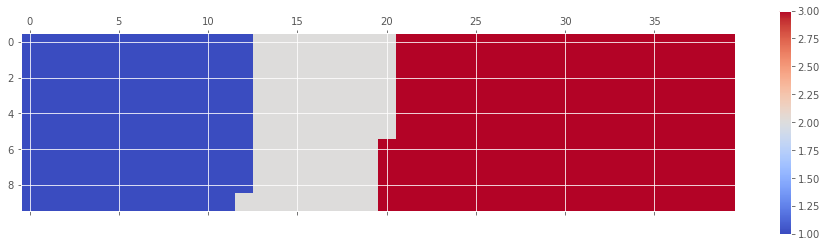

In [18]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

<b>Step 6.</b> Percantik chart

([], [])

<Figure size 432x288 with 0 Axes>

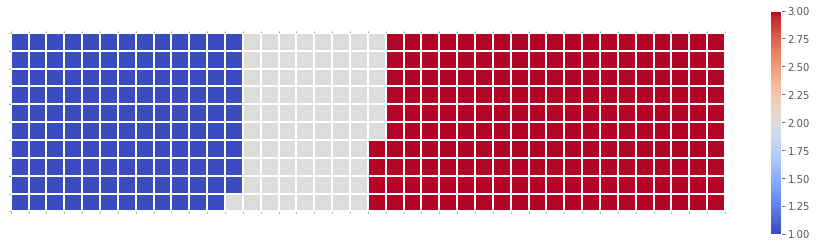

In [19]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<b>Step 7.</b> Tambahkan legend

<Figure size 432x288 with 0 Axes>

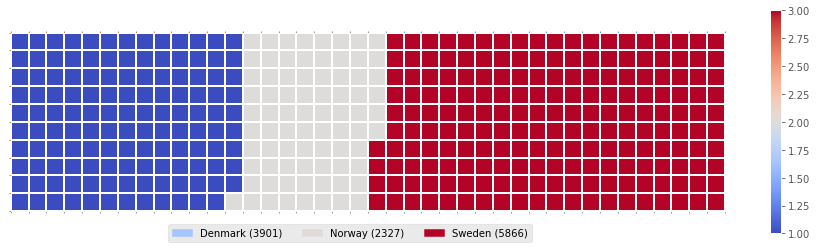

In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str)) 
                                      
# add legend to chart
plt.legend(handles = legend_handles,
          loc = 'lower center',
          ncol = len(df_dsn.index.values),
          bbox_to_anchor = (0., -0.2, 0.95, .1)
          )

Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:

- categories: Unique categories or classes in dataframe.
- values: Values corresponding to categories or classes.
- height: Defined height of waffle chart.
- width: Defined width of waffle chart.
- colormap: Colormap class
- value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. <b>value_sign</b> has a default value of empty string.

In [21]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))
    
    #define indices to loop through waffle chart
    category_index = 0
    tile_index = 0
    
    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
            # is equal to its corresponding allocated tiles....
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...processd to the next category
                category_index += 1
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
            
    # instantiate a new figure object
    fig = plt.figure()
    
    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])
    
    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(df_dsn.index.values):
        label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str)) 

    # add legend to chart
    plt.legend(handles = legend_handles,
              loc = 'lower center',
              ncol = len(df_dsn.index.values),
              bbox_to_anchor = (0., -0.2, 0.95, .1)
              )


Sekarang untuk membuat waffle, yang harus kita lakukan adalah memanggil fungsi <b>create_waffle_chart</b>. Mari tentukan parameter input:

In [22]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # corresponding values of categories

colormap = plt.cm.coolwarm

Dan sekarang mari kita panggil fungsi kita untuk membuat <b>waffle</b>.

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

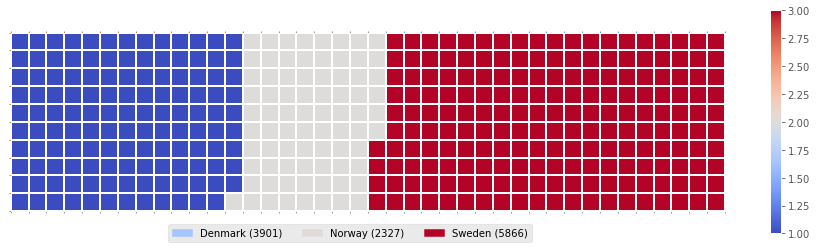

In [23]:
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds

Word clouds (juga dikenal sebagai text cloud atau tag clouds) bekerja dengan cara yang sederhana:
<b>semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.</b>

Untungnya, sebuah package sudah ada di Python untuk menghasilkan word clouds. Package itu bernama <b>word_cloud</b> dikembangkan oleh <b>Andreas Mueller</b>.

Mari gunakan package ini untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

<b>Pertama,</b> mari install packagenya.

In [24]:
# install wordcloud

# !pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('WordCloud is installed and imported!')

WordCloud is installed and imported!


Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan <b>Lewis Carroll</b> berjudul <i>Alices's Adventures in Wonderland</i>.

Ayo lanjutkan dan buka file.txt dari novel.

In [25]:
# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


Selanjutnya, mari gunakan <b>stopwords</b> yangkita impor dari word_cloud. Kita menggunakan <i>set</i> untuk menghapus stopwords yang berlebihan.

In [26]:
stopwords = set(STOPWORDS)

Buat word cloud object dan generate word cloud.

Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

In [27]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

Hebat! Sekarang setelah word cloud dibuat, mari kita visualisasikan.

In [28]:
# generate the word cloud
alice_wc.generate(alice_novel)

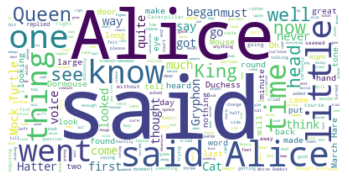

In [29]:
# display the word cloud
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah <b>Alice</b>, <b>said</b>, <b>little</b>, <b>went</b> dan seterusnya. 

Mari ubah ukuran cloud sehingga dapat melihat kata-kata yang jarang digunakan dengan lebh baik.

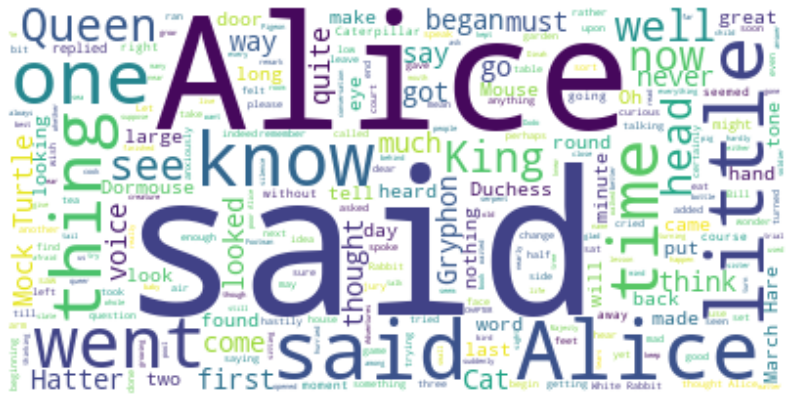

In [30]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik! Namun, <b>said</b> bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.

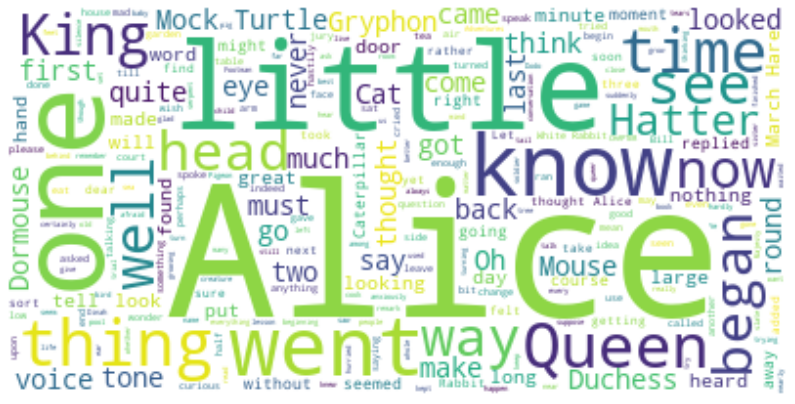

In [31]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Luar biasa! Terlihat sangat menarik! Hal keren lainnya yang dapat kalian terapkan dengan package word_cloud adalah <b>melapiskan kata-kata ke mask dalam bentuk apapun</b>.

Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan buka image <i>alice_mask.png</i>.

In [32]:
# save mask to alice_mask
alice_mask = np.array(Image.open('gambar/alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


Mari kita lihat bagaimana maskingnya terlihat.

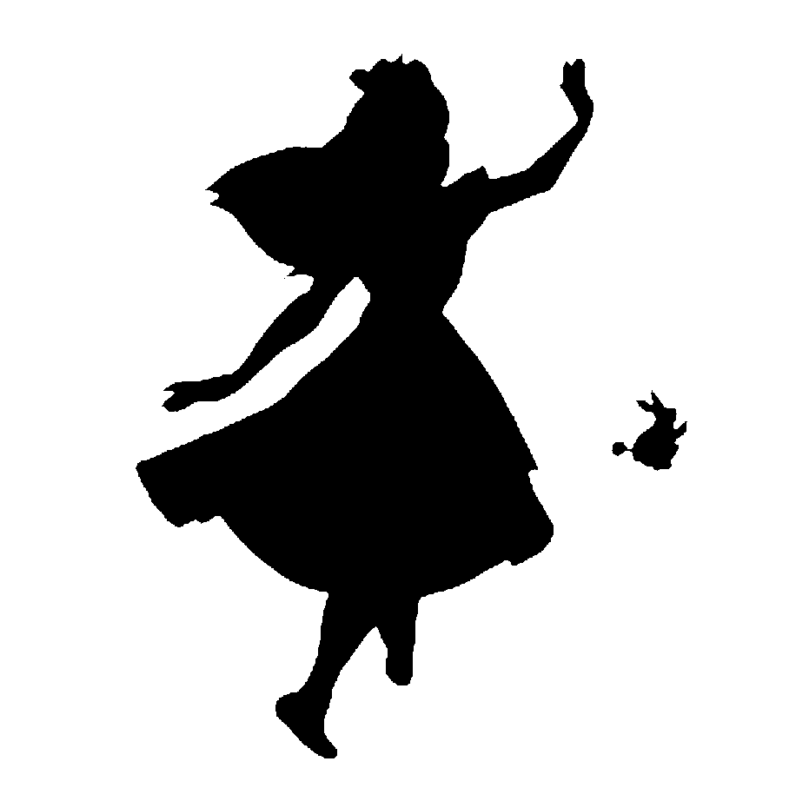

In [33]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud. Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

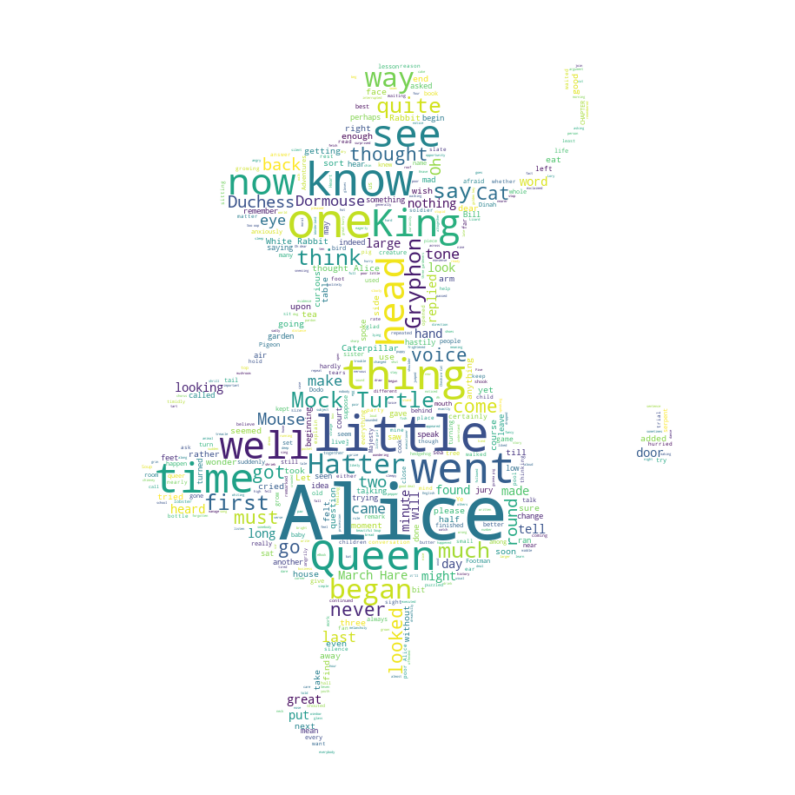

In [34]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi dimana ada kemauan pasti ada jalan. Mari kita ubah contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.

Mari kita ingat seperti apa data kita.

In [35]:
df_can.head()

,Contient,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Dan berapa total imigrasi dari 1980 hingga 2013?

In [36]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [37]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Kita tidak berurusan dengan stopwords apa pun disini, jadi tidak perlu passing saat membuat kata cloud.

In [38]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


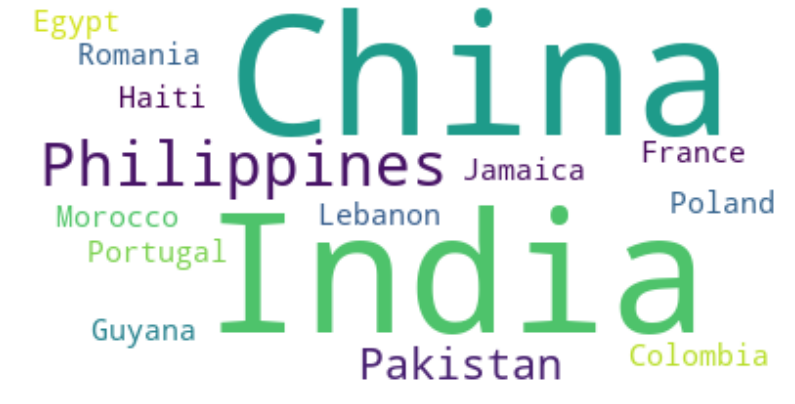

In [39]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regressions Plot

Di section ini, kita akan menjelajahi <b>seaborn</b> dan melihat seberapa efiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

### Mari kita install seaborn:

In [40]:
# install seaborn
!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

In [41]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Dengan seaborn, membuat plot regresi semudah memanggil fungsi <b>regplot</b>.

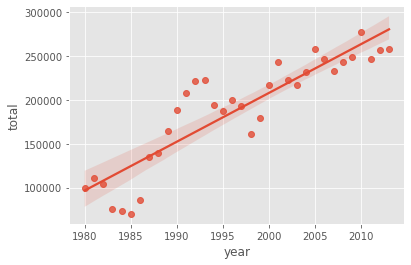

In [42]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan aris regresi. Mari kita ubah warnanya menjadi hijau.

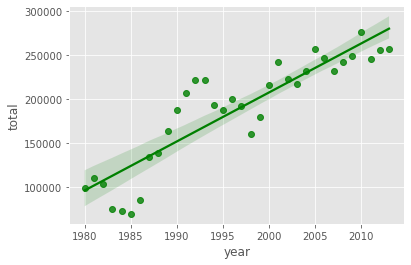

In [43]:
import seaborn as sns
ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'.

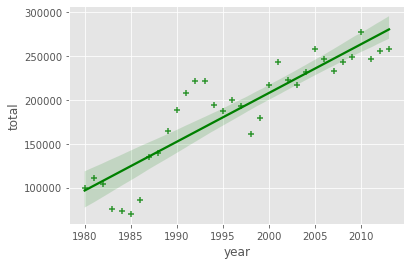

In [44]:
import seaborn as sns
ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+')

Mari kita perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.

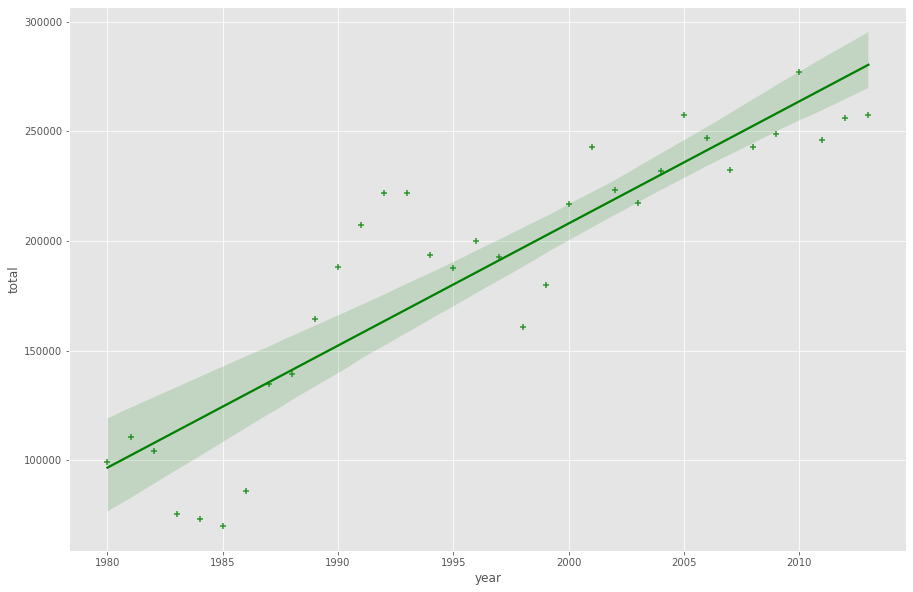

In [45]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Dari mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

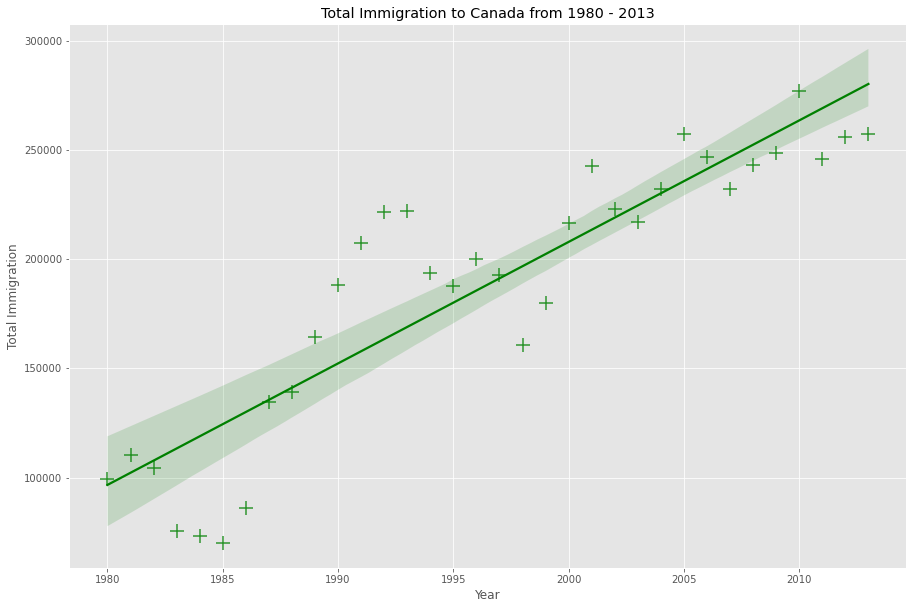

In [46]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

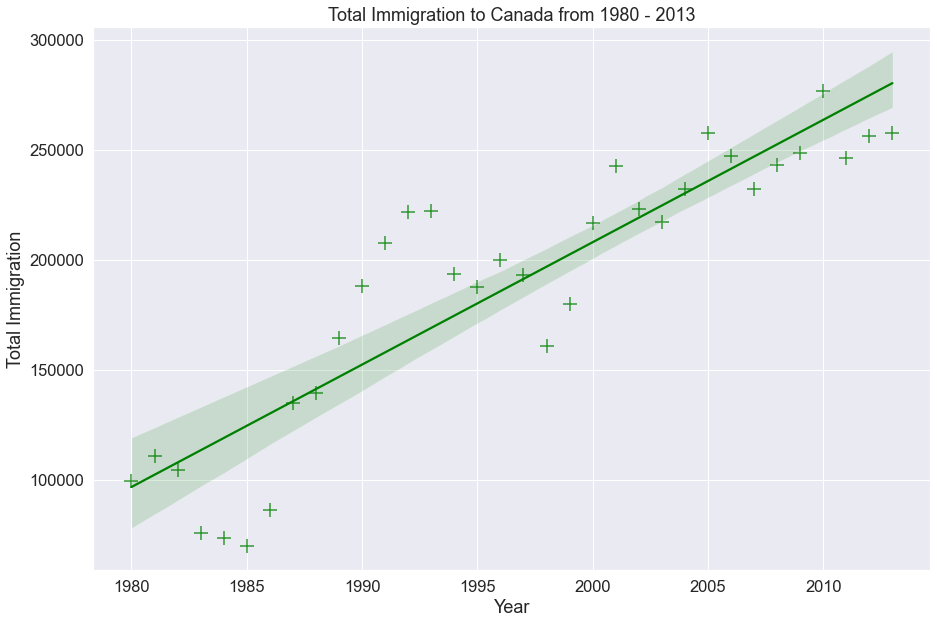

In [47]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Luar biasa! Scatter Plot lengkap dengan regression fit dengan hanya 5 baris kode.

Jika kalian bukan penggemar background default ini, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

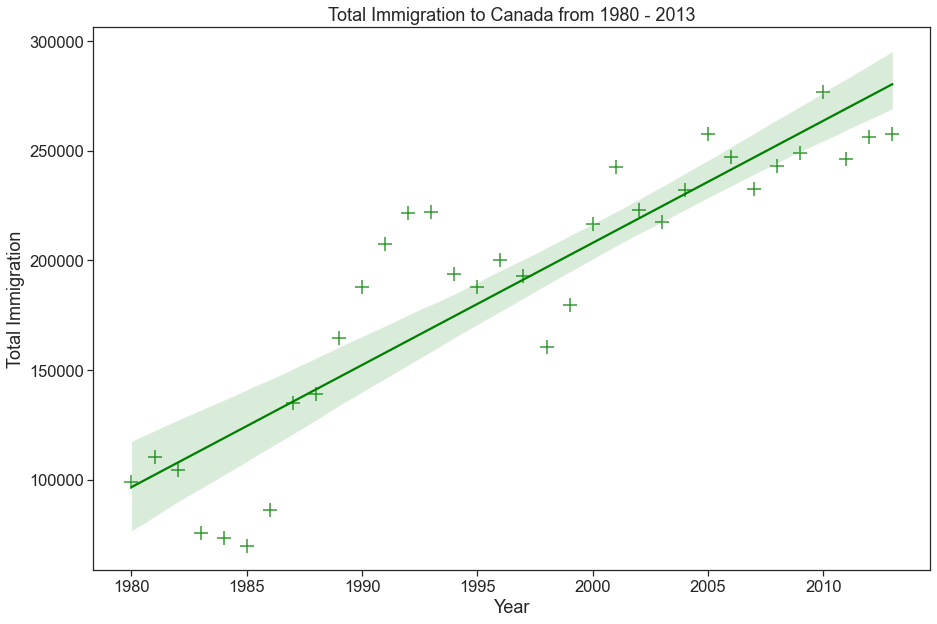

In [48]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s':200})

ax.set(xlabel='Year',
       ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Atur ke latarbelakang putih dengan garis kisi/grid lines.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

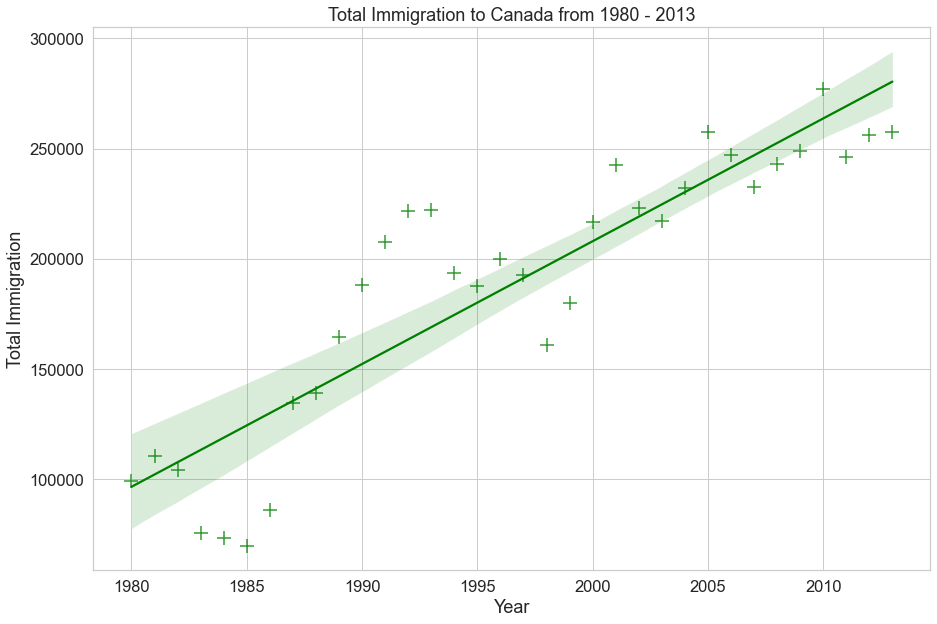

In [49]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

<b>Question:</b> Use seaborn to create a scatter plot with a regression line to visualize the total immigtration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')

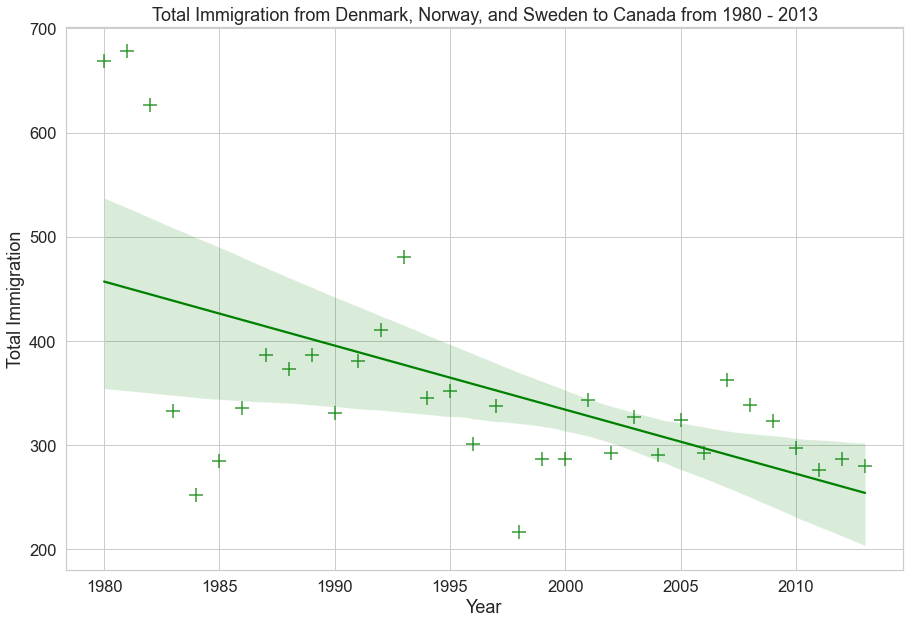

In [50]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15,10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')